In [13]:
#30 times tests in domain
import sys
import os
sys.path.append('..')
from src.includes import *

model_name = 'plstm'
home_path = '/home/swj/VD/'
ways = 'myway'
classifier = 'RF'
code_type = 'python'
mode = "remote_code_execution"

#change this floder
path = home_path + 'Representation/' + model_name + '_' + ways + '/' + code_type + '/' + mode + '/'
save_path = home_path + 'src/' + model_name + '_' + ways + '/' + code_type + '/' + mode + '/'

X, y = LoadPickleData(path + 'X_test.pkl'), LoadPickleData(path + 'y_test.pkl')

res = list()
for i in range(30):
    clf = None
    if classifier == 'SVM':
        clf = SVC()
    elif classifier == 'MLP':
        clf = MLPClassifier(hidden_layer_sizes=200, random_state=None, max_iter=300)
    elif classifier == 'RF':
        clf = RandomForestClassifier(bootstrap=True, class_weight='balanced', #class_weight={0:1, 1:4},
                    criterion='entropy', max_depth=40, max_features='auto',
                    max_leaf_nodes=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=3,
                    min_samples_split=4, min_weight_fraction_leaf=0.0,
                    n_estimators=8000, oob_score=False, random_state=None,
                    verbose=0, warm_start=False, n_jobs=-1)
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf = clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    target_names = ["Non-defective","Defective"] #non-buggy->0, buggy->1
    ans = classification_report(y_test, y_predict, target_names=target_names, output_dict=True)
    print('#' + str(i) + ':', ans['Defective']['precision'], ans['Defective']['recall'], ans['Defective']['f1-score'], ans['accuracy'])
    res.append(['#' + str(i) + ':', ans['Defective']['precision'], ans['Defective']['recall'], ans['Defective']['f1-score'], ans['accuracy']])
res = np.array(res)
res = res[:, 1:6]
df = pd.DataFrame(res, columns=['precision', 'recall', 'f1-score', 'accuracy'])

if not os.path.exists(save_path): os.makedirs(save_path)
#change this also according above
df.to_csv(save_path + model_name + '_' + mode + '_res.csv')


#0: 0.9545454545454546 0.9545454545454546 0.9545454545454546 0.9962335216572504
#1: 1.0 0.9090909090909091 0.9523809523809523 0.9962335216572504
#2: 0.9285714285714286 1.0 0.962962962962963 0.9962335216572504
#3: 1.0 0.95 0.9743589743589743 0.9981167608286252
#4: 1.0 0.9 0.9473684210526316 0.9943502824858758
#5: 0.84 0.9545454545454546 0.8936170212765958 0.9905838041431262
#6: 0.9583333333333334 0.9583333333333334 0.9583333333333334 0.9962335216572504
#7: 0.9259259259259259 0.9615384615384616 0.9433962264150944 0.9943502824858758
#8: 0.9523809523809523 0.9090909090909091 0.9302325581395349 0.9943502824858758
#9: 0.9473684210526315 0.9473684210526315 0.9473684210526315 0.9962335216572504
#10: 1.0 0.9259259259259259 0.9615384615384615 0.9962335216572504
#11: 1.0 0.9230769230769231 0.9600000000000001 0.9962335216572504
#12: 0.92 1.0 0.9583333333333334 0.9962335216572504
#13: 0.9411764705882353 0.9411764705882353 0.9411764705882353 0.9962335216572504
#14: 0.95 1.0 0.9743589743589743 0.9981

[[ 0.          0.95454545  0.95454545  0.95454545  0.99623352]
 [ 1.          1.          0.90909091  0.95238095  0.99623352]
 [ 2.          0.92857143  1.          0.96296296  0.99623352]
 [ 3.          1.          0.95        0.97435897  0.99811676]
 [ 4.          1.          0.9         0.94736842  0.99435028]
 [ 5.          0.84        0.95454545  0.89361702  0.9905838 ]
 [ 6.          0.95833333  0.95833333  0.95833333  0.99623352]
 [ 7.          0.92592593  0.96153846  0.94339623  0.99435028]
 [ 8.          0.95238095  0.90909091  0.93023256  0.99435028]
 [ 9.          0.94736842  0.94736842  0.94736842  0.99623352]
 [10.          1.          0.92592593  0.96153846  0.99623352]
 [11.          1.          0.92307692  0.96        0.99623352]
 [12.          0.92        1.          0.95833333  0.99623352]
 [13.          0.94117647  0.94117647  0.94117647  0.99623352]
 [14.          0.95        1.          0.97435897  0.99811676]
 [15.          0.95833333  0.92        0.93877551  0.99

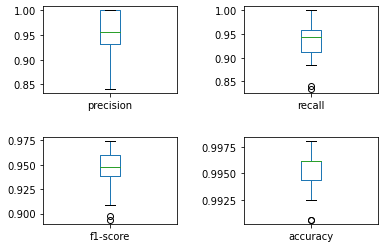

In [14]:
#plot the boxx
import sys
import os
sys.path.append('..')
from src.includes import *

model_name = 'plstm'
home_path = '/home/swj/VD/'
ways = 'myway'
classifier = 'RF'
code_type = 'python'
mode = "remote_code_execution"

path = home_path + 'src/' + model_name + '_' + ways + '/' + code_type + '/' + mode + '/'
files= os.listdir(path)

res_data = []

res = pd.read_csv(path + model_name + '_' + mode + '_res.csv')
fig,axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
res['precision'].plot(kind='box',ax=axes[0][0])
res['recall'].plot(kind='box',ax=axes[0][1])
res['f1-score'].plot(kind='box',ax=axes[1][0])
res['accuracy'].plot(kind='box',ax=axes[1][1])
fig.savefig(path + model_name + '_' + mode + '_res.png')

res = np.array(res)
print(res)
precision = np.median(res[:, 1])
recall = np.median(res[:, 2])
f1_score = np.median(res[:, 3])
accuracy = np.median(res[:, 4])
print('their are', precision, recall, f1_score, accuracy)
p_iqr = np.quantile(res[:, 1] ,0.75,interpolation='higher') - np.quantile(res[:, 1] ,0.25,interpolation='lower')
r_iqr = np.quantile(res[:, 2] ,0.75,interpolation='higher') - np.quantile(res[:, 2] ,0.25,interpolation='lower')
f_iqr = np.quantile(res[:, 3] ,0.75,interpolation='higher') - np.quantile(res[:, 3] ,0.25,interpolation='lower')
a_iqr = np.quantile(res[:, 4] ,0.75,interpolation='higher') - np.quantile(res[:, 4] ,0.25,interpolation='lower')
res_data.append([precision, p_iqr, recall, r_iqr, f1_score, f_iqr, accuracy, a_iqr])

res_data = np.array(res_data)

df = pd.DataFrame(res_data, columns=['precision', 'p_iqr', 'recall', 'r_iqr', 'f1-score', 'f_iqr', 'accuracy', 'a_iqr'])
df.to_csv(path + model_name + '_' + mode + '_res.csv')
